# Calculating Entangling Power for Parameterized Quantum Circuits (PQCs)

In this tutorial, we will learn how to calcualte expressibility of Parameterized Quantum Circuits (PQCs) using qLEET, which could thought of as traversing power of a PQC in the Hilbert space. We look at different parameterized states generated by the sampled ensemble of parameters for a given PQCm and then calculate entanglment measures for the resulting distribution of states generated by this sampled ensemble.

We currently support two engtanglement measures - **Meyer-Wallach measure** and **Scott Measure**
$$ Q^{MW} = \frac{2}{|\vec{\theta}|}\sum_{\theta_{i}\in \vec{\theta}}
            \Bigg(1-\frac{1}{n}\sum_{k=1}^{n}Tr(\rho_{k}^{2}(\theta_{i}))\Bigg)$$
$$ Q^{SM} \equiv Q_{m} = \frac{2^{m}}{(2^{m}-1) |\vec{\theta}|}\sum_{\theta_i \in \vec{\theta}}
            \bigg(1 - \frac{m! (n-m)!)}{n!}\sum_{|S|=m} \text{Tr} (\rho_{S}^2 (\theta_i)) \bigg) \quad\quad m= 1, \ldots, \lfloor n/2 \rfloor $$

In [2]:
# necessary imports 
import numpy as np
import qiskit
import qleet

## Circuit 1 - Identity

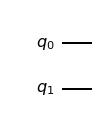

In [3]:
qiskit_circuit = qiskit.QuantumCircuit(2)
qiskit_circuit.draw("mpl")

In [4]:
params = []
qiskit_descriptor = qleet.interface.circuit.CircuitDescriptor(
    circuit=qiskit_circuit, params=params, cost_function=None
)

In [5]:
qiskit_entanglement_capability = (
    qleet.analyzers.entanglement.EntanglementCapability(
        qiskit_descriptor, samples=100
    )
)

In [6]:
entanglement_mw = qiskit_entanglement_capability.entanglement_capability("meyer-wallach")
entanglement_mw

0.0

In [7]:
entanglement_scott = qiskit_entanglement_capability.entanglement_capability("scott")
entanglement_scott

array([0.])

## Circuit 2

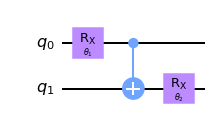

In [8]:
params = [qiskit.circuit.Parameter(r"$θ_1$"), qiskit.circuit.Parameter(r"$θ_2$")]
qiskit_circuit = qiskit.QuantumCircuit(2)
qiskit_circuit.rx(params[0], 0)
qiskit_circuit.cx(0, 1)
qiskit_circuit.rx(params[1], 1)
qiskit_circuit.draw("mpl")

In [9]:
qiskit_descriptor = qleet.interface.circuit.CircuitDescriptor(
    circuit=qiskit_circuit, params=params, cost_function=None
)
qiskit_entanglement_capability = (
    qleet.analyzers.entanglement.EntanglementCapability(
        qiskit_descriptor, samples=1000
    )
)

In [10]:
entanglement_mw = qiskit_entanglement_capability.entanglement_capability("meyer-wallach")
entanglement_mw

0.5012448401904495

In [11]:
entanglement_scott = qiskit_entanglement_capability.entanglement_capability("scott")
entanglement_scott

array([0.48700879])

In [17]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:51% !important; }</style>"))

## Circuit 3 

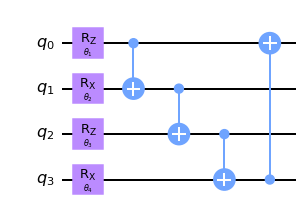

In [18]:
params = [qiskit.circuit.Parameter(r"$θ_1$"), qiskit.circuit.Parameter(r"$θ_2$"), 
          qiskit.circuit.Parameter(r"$θ_3$"), qiskit.circuit.Parameter(r"$θ_4$")]
qiskit_circuit = qiskit.QuantumCircuit(4)
qiskit_circuit.rz(params[0], 0)
qiskit_circuit.rx(params[1], 1)
qiskit_circuit.rz(params[2], 2)
qiskit_circuit.rx(params[3], 3)
qiskit_circuit.cx(0, 1)
qiskit_circuit.cx(1, 2)
qiskit_circuit.cx(2, 3)
qiskit_circuit.cx(3, 0)

qiskit_circuit.draw("mpl")

In [19]:
qiskit_descriptor = qleet.interface.circuit.CircuitDescriptor(
    circuit=qiskit_circuit, params=params, cost_function=None
)
qiskit_entanglement_capability = (
    qleet.analyzers.entanglement.EntanglementCapability(
        qiskit_descriptor, samples=500
    )
)

In [20]:
entanglement_mw = qiskit_entanglement_capability.entanglement_capability("meyer-wallach")
entanglement_mw

0.6330933276847219

In [21]:
entanglement_scott = qiskit_entanglement_capability.entanglement_capability("scott")
entanglement_scott

array([0.6208542 , 0.49720678])